# Machine Larning Course - Projecte

## Part 1: Supervised Learning - Classifying Text or Images
## Option A: Classify News Headlines into Categories (Text)

In [3]:
!pip install datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.9/484.9 kB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 17.9 MB/s eta 0:00:00


**Import Libraries**

In [6]:
from datasets import load_dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score


**Load and Explore the Dataset**

In [7]:
# Load the AG News dataset
dataset = load_dataset("wangrongsheng/ag_news")

# Display the first data sample
print(dataset['train'][0])

# Check the available labels
print(dataset['train'].features['label'].names)


{'text': "Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\\band of ultra-cynics, are seeing green again.", 'label': 2}
['World', 'Sports', 'Business', 'Sci/Tech']


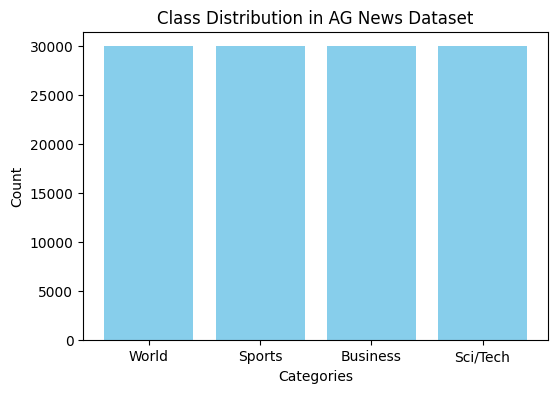

In [13]:
import matplotlib.pyplot as plt

label_names = dataset['train'].features['label'].names
label_counts = [labels.count(i) for i in range(len(label_names))]

plt.figure(figsize=(6, 4))
plt.bar(label_names, label_counts, color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Class Distribution in AG News Dataset')
plt.show()


**Preprocess the Text Data**

**Tokenization & TF-IDF Vectorization**

In [8]:
# Prepare data
texts = [sample['text'] for sample in dataset['train']]
labels = [sample['label'] for sample in dataset['train']]

# Vectorize text using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(texts)
y = labels


**Split Data into Training and Testing Sets**

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


**Train Multiple Classifiers**

**Initialize & Train Models and Evaluate Accuracy**

In [10]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

results = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}\n")



Training Logistic Regression...
Logistic Regression Accuracy: 0.9103

Training Decision Tree...
Decision Tree Accuracy: 0.8075

Training Gradient Boosting...
Gradient Boosting Accuracy: 0.8338

Training K-Nearest Neighbors...
K-Nearest Neighbors Accuracy: 0.8912



**Evaluate Models Using Precision, Recall, and F1-Score**

In [11]:
for name, model in models.items():
    print(f"Classification Report for {name}:")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred, target_names=dataset['train'].features['label'].names))


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

       World       0.92      0.90      0.91      6000
      Sports       0.95      0.97      0.96      6000
    Business       0.88      0.88      0.88      6000
    Sci/Tech       0.89      0.89      0.89      6000

    accuracy                           0.91     24000
   macro avg       0.91      0.91      0.91     24000
weighted avg       0.91      0.91      0.91     24000

Classification Report for Decision Tree:
              precision    recall  f1-score   support

       World       0.81      0.81      0.81      6000
      Sports       0.87      0.88      0.88      6000
    Business       0.77      0.78      0.77      6000
    Sci/Tech       0.78      0.76      0.77      6000

    accuracy                           0.81     24000
   macro avg       0.81      0.81      0.81     24000
weighted avg       0.81      0.81      0.81     24000

Classification Report for Gradient Boostin

**Compare Model Performance**

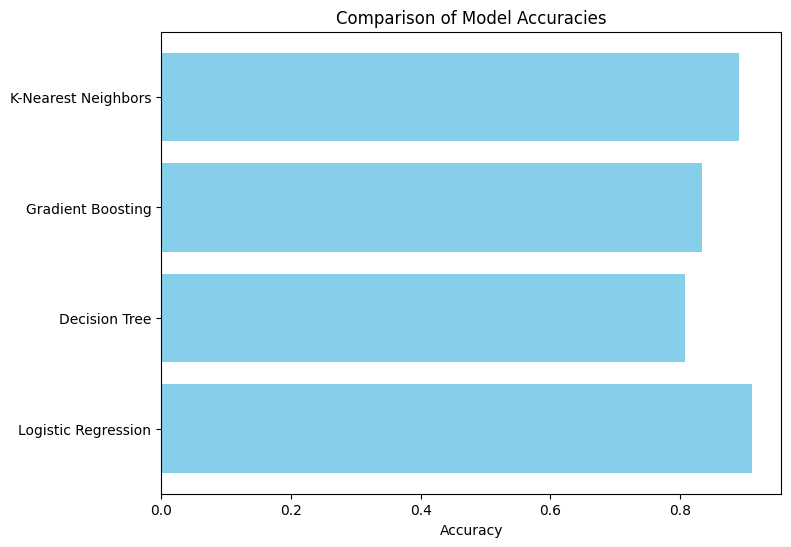

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.barh(list(results.keys()), list(results.values()), color='skyblue')
plt.xlabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.show()
